# Twitter Sentiment Classification - CLIMATE CHANGE¶

## COLLABORATORS



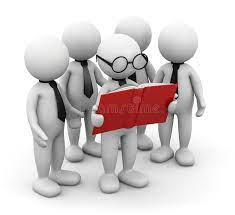

- ⚡ Emmanuel Obeng Afari - Ghana
- ⚡ Maryam Quadri - Nigeria
- ⚡ Kenechukwu Ozojie - Nigeria
- ⚡ Ndinannyi Mukwevho - South Africa
- ⚡ Babajide Adelekan - Nigeria
- ⚡ Augustine Okafor - Nigeria

## INTRODUCTION¶

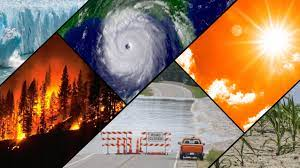

Climate change refers to long-term shifts in temperatures and weather patterns. These shifts may be natural, such as through variations in the solar cycle.



### Effects of Climate Change




- Hotter temperatures. As greenhouse gas concentrations rise, so does the global surface temperature.
- More severe storms.
- Increased drought.
- A warming, rising ocean.
- Loss of species.
- Not enough food.
- More health risks.
- Poverty and displacement.

## STATEMENT OF PROBLEM: Predict an individual’s belief in climate change based on their tweets!


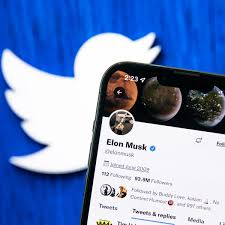

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging us during the Classification Sprint with the task of:

- 1 Creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.
- 2 Provide an accurate and robust solution to this task that gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories thus increasing their insights and informing future marketing strategies.
- 3 Employ Mean F1-Score evaluation metric for this project
- 4 Build an app using streamlit for our analysis and models and deploy the app on EC2
- 5 Communicate our findings through this notebook and a video conference presentation

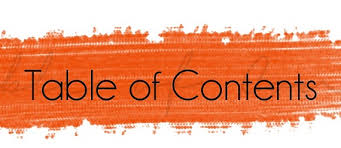

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

# Comet.ml

connecting our notebook to the version control platform comet.ml to track our experiments

In [25]:
# Importing comet_ml
import comet_ml
from comet_ml import Experiment, OfflineExperiment

# Creating an experiment with your api key
experiment = Experiment(
    api_key="sj5muA45yTe4qncu3OyeXQ6W2",
    project_name="Twitter Climate Change Sentimental Analysis",
    workspace="obengkojo23",
)

ModuleNotFoundError: No module named 'comet_ml'

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In Python, you use the import keyword to make code in one module available in another. Imports in Python are important for structuring your code effectively. Using imports properly will make you more productive, allowing you to reuse code while keeping your projects maintainable.

In [46]:
# Libraries for data loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import nltk
import re
#import spacy
%matplotlib inline
from wordcloud import WordCloud
from plotly import graph_objects as go
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Libraries for data loading, data manipulation and data visulisation
#import *

# Libraries for data preparation and model building
#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###
# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image

# Downloads
#nlp = spacy.load('en')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NDINANNYI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NDINANNYI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NDINANNYI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

Data are generally stored in excel file formats like CSV, TXT, Excel etc. Loading data into the python environment is the most initial step of analyzing the data.

The datas of interest here is in the csv format and they are:
- train dataset
- test dataset



In [47]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test_with_no_labels.csv')

In [48]:
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


Train dataset (train_df) has 3 columns, the **sentiment**, **message** and **tweetid**.

where:

- tweetid is the Unique numeric twitter ID for the tweet
- message is the the tweet itself
- sentiment is the class the tweet belongs to.

In [49]:
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


Test dataset has 2 columns, the **message** and **tweetid** as shown in the dataframe above


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


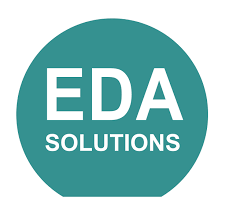

Exploratory Data Analysis (EDA) helps us to understand our data without making any assumptions.

In [50]:
#Check shape of datasets
print(f'The shape of the train dataset: {train_df.shape}\nThe shape of the test dataset:  {test_df.shape}')

The shape of the train dataset: (15819, 3)
The shape of the test dataset:  (10546, 2)


observation:

From the data above we can seee the number of rows and columns each dataframe has 

In [51]:
#check for null values in both train and test dataset 
print('Train Dataset\n************')
display(train_df.isnull().sum())

print('Test Dataset\n************')
display(test_df.isnull().sum())

Train Dataset
************


sentiment    0
message      0
tweetid      0
dtype: int64

Test Dataset
************


message    0
tweetid    0
dtype: int64

Observation:
    
    The datasets has no missing values 

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Observation:
    
    The train dataset has 2 columns ('sentiment' and 'tweetid') that belongs to the integer datatype while the 'message'
    column belongs to the object datatype

### 3.1 Target Variable

In [53]:
# check the unique values in target feature
train_df['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

![SENTIMENTS](../images/sentiments.png)

The image above shows the level of belief a person has in climate change based on their tweeet's unique sentiment class

Text(0.5, 0, 'Sentiments')

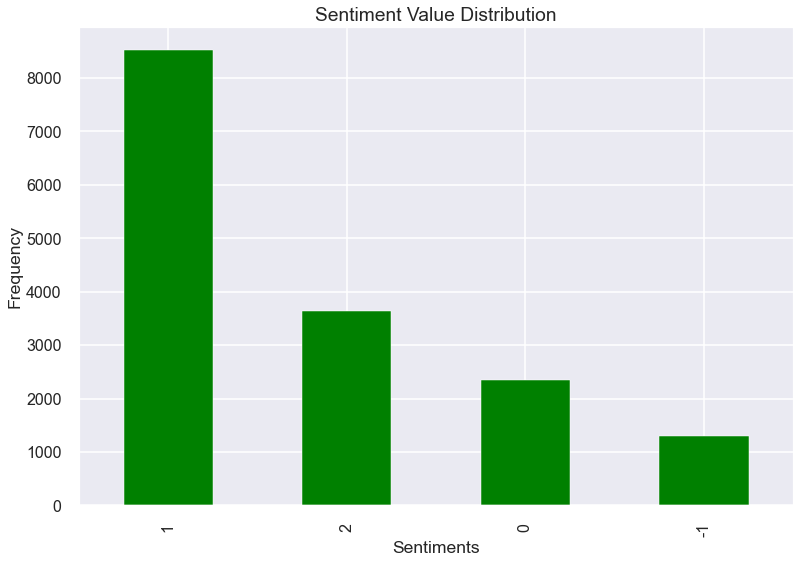

In [54]:
#visualise distribution of each sentiment within the target feature
train_df['sentiment'].value_counts().plot(kind='bar', color='green')
plt.title('Sentiment Value Distribution')
plt.ylabel('Frequency')
plt.xlabel('Sentiments')

Observation:
    
    The graph is showing how many people belong to each sentiment class

## Univariate: non-graphical

In [81]:
#convert class from numerical to word definition of class

def class_convert(df):
    
    df = train_df.copy()
    word_class = []
    old_class = df['sentiment']
    
    for class_num in old_class:
        if class_num == 2:
            word_class.append('News')
        elif class_num == 1:
            word_class.append('Pro')
        elif class_num == 0:
            word_class.append('Neutral')
        else:
            word_class.append('Anti')
            
    df['sentiment'] = word_class
    df['length'] = df['message'].str.len()
        
    return df

train_copy = class_convert(train_df)
test_copy = test_df.copy()
#test_copy = class_convert(test_df)

Observation:

This is use to define each sentiment class in a new dataframe

In [56]:
train_copy.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [57]:
test_copy.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [58]:
#check message count grouped by sentiment
sentiment_temp_table = train_copy.groupby('sentiment').count()['message'].reset_index().sort_values(by='message', ascending=False)
sentiment_temp_table

,sentiment,message
3,Pro,8530
2,News,3640
1,Neutral,2353
0,Anti,1296


Observation:

This is showing the number of people in each sentiment class

## Univariate: graphical

**Bar Chart and pie chart**

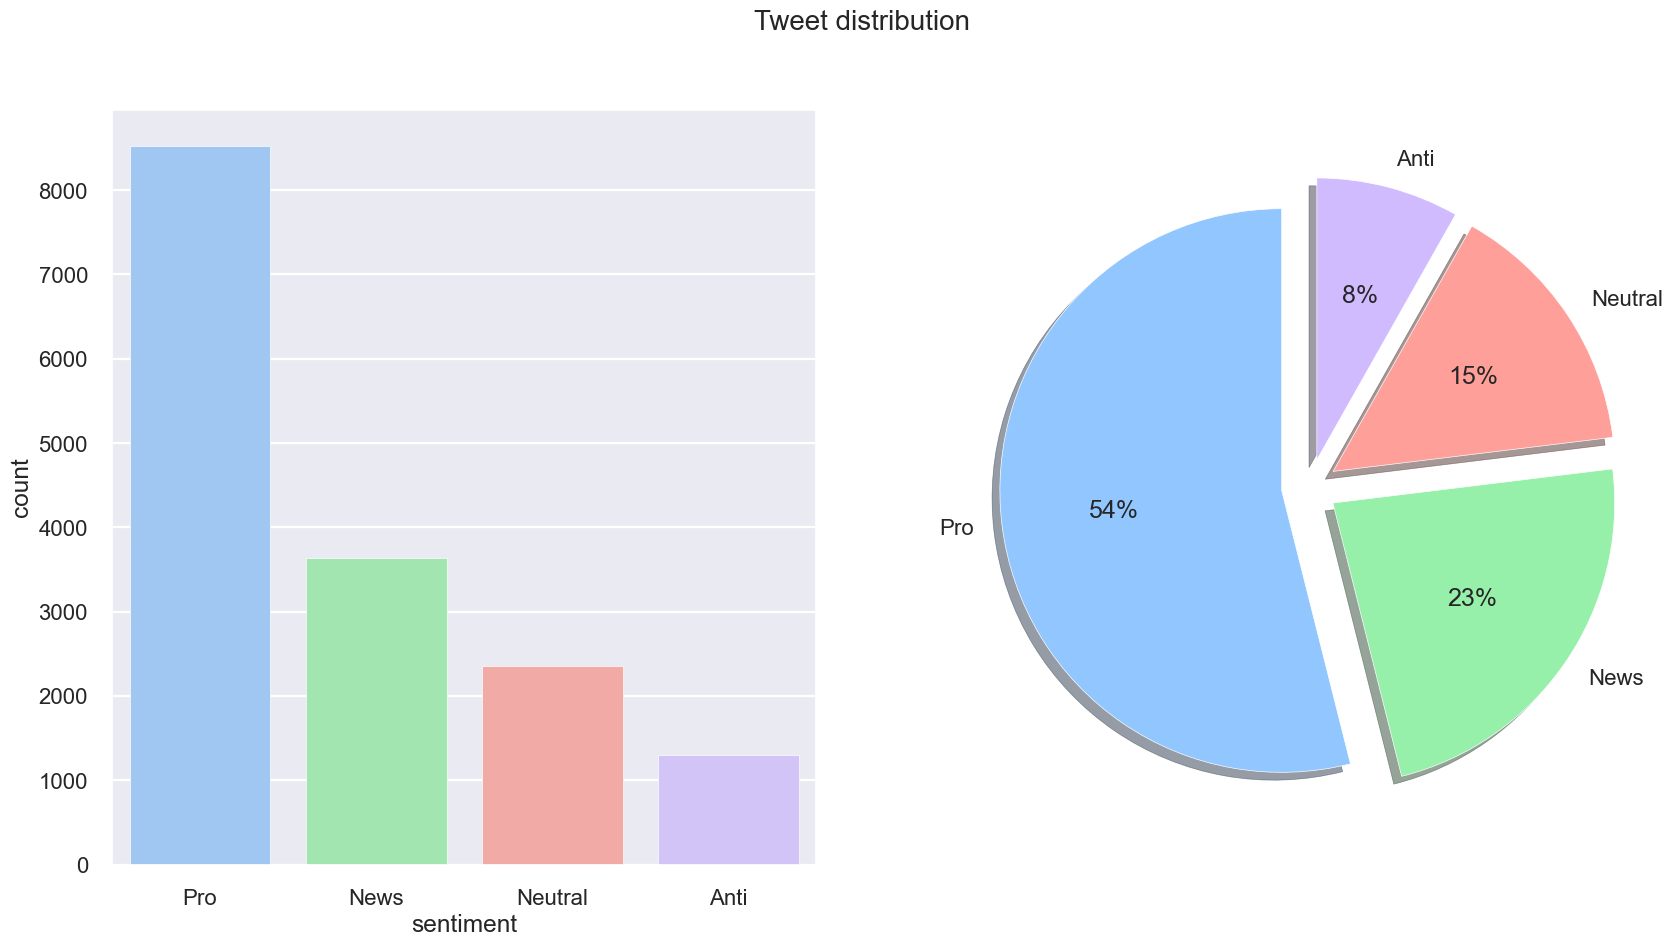

In [68]:
# Display target distribution
style.use('seaborn-pastel')

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 10), 
                         dpi=100)

sns.countplot(train_copy['sentiment'], ax=axes[0])

labels=['Pro', 'News', 'Neutral', 'Anti'] 

axes[1].pie(train_copy['sentiment'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.suptitle('Tweet distribution', fontsize=20)
plt.show()

In [79]:
fig = go.Figure(go.Funnel(
    y = ['Pro', 'News', 'Neutral', 'Anti'], 
    x = train_copy.sentiment.value_counts(normalize = True) * 100 
    ))
fig.show()

The bar graph and pie-chart demonstrate the obvious imbalance in the data, where the Pro sentiment climate change account for the majority of tweets (53.9%). If this affects the model's accuracy, it might be adjusted later.

### Checking Dupicate tweets

In [70]:
# Select all duplicate rows based on the message column from train dataset
duplicate_train_df = train_copy[train_copy.
                    duplicated(['message',
                                'sentiment'],
                               keep=False)]

# View top 5 duplicate rows
duplicate_train_df.shape

(1900, 3)

We are checking if none of message and sentimennt is duplicated in the dataset

Text(0.5, 0, 'Sentiments')

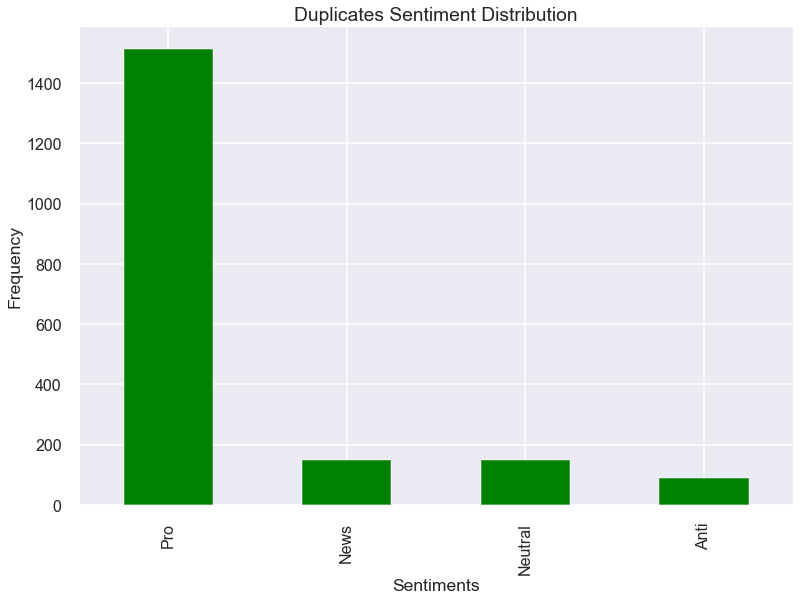

In [71]:
# visualise distribution of duplicate tweet
duplicate_train_df['sentiment'].value_counts().plot(kind='bar', color='green')
plt.title('Duplicates Sentiment Distribution')
plt.ylabel('Frequency')
plt.xlabel('Sentiments')

**Wordclouds**

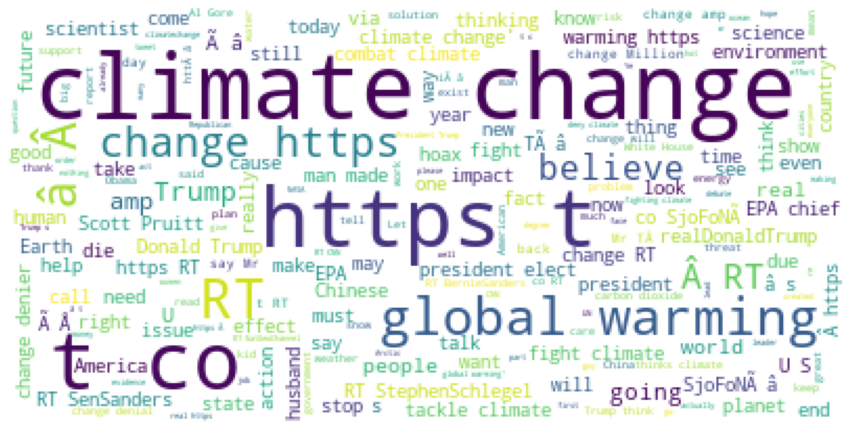

In [94]:
full_text = " ".join(train_df['message'])
wc = WordCloud(background_color='white')
img = wc.generate(full_text)
plt.figure(figsize= (15,15))
plt.imshow(img)
plt.axis('off')
plt.show()

We will be able to identify high frequency words with the aid of word clouds for all sentiment classes.

In [75]:
senti_gb = train_copy.groupby('sentiment')

In [76]:
Anti = "".join(senti_gb.get_group('Anti')['message'])
Neutral = "".join(senti_gb.get_group('Neutral')['message'])
Pro = "".join(senti_gb.get_group('Pro')['message'])
News = "".join(senti_gb.get_group('News')['message'])

In [77]:

# Create wordcloud for the anti climate change class
Anti_wc = WordCloud(width=800, 
                           height=500, 
                           random_state=110, 
                           max_font_size=110, 
                           background_color='white',
                           colormap="Purples").generate(Anti)

# Create wordcolud for the pro climate change class
Pro_wc = WordCloud(width=800, 
                          height=500, 
                          random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Blues").generate(Pro)

# Create wordcolud for the news climate change class
News_wc = WordCloud(width=800, 
                          height=500, 
                          random_state=0, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Greys").generate(News)

# Create wordcolud for the neutral climate change class
Neutral_wc = WordCloud(width=800, 
                          height=500, 
                          random_state=10, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Greens").generate(Neutral)


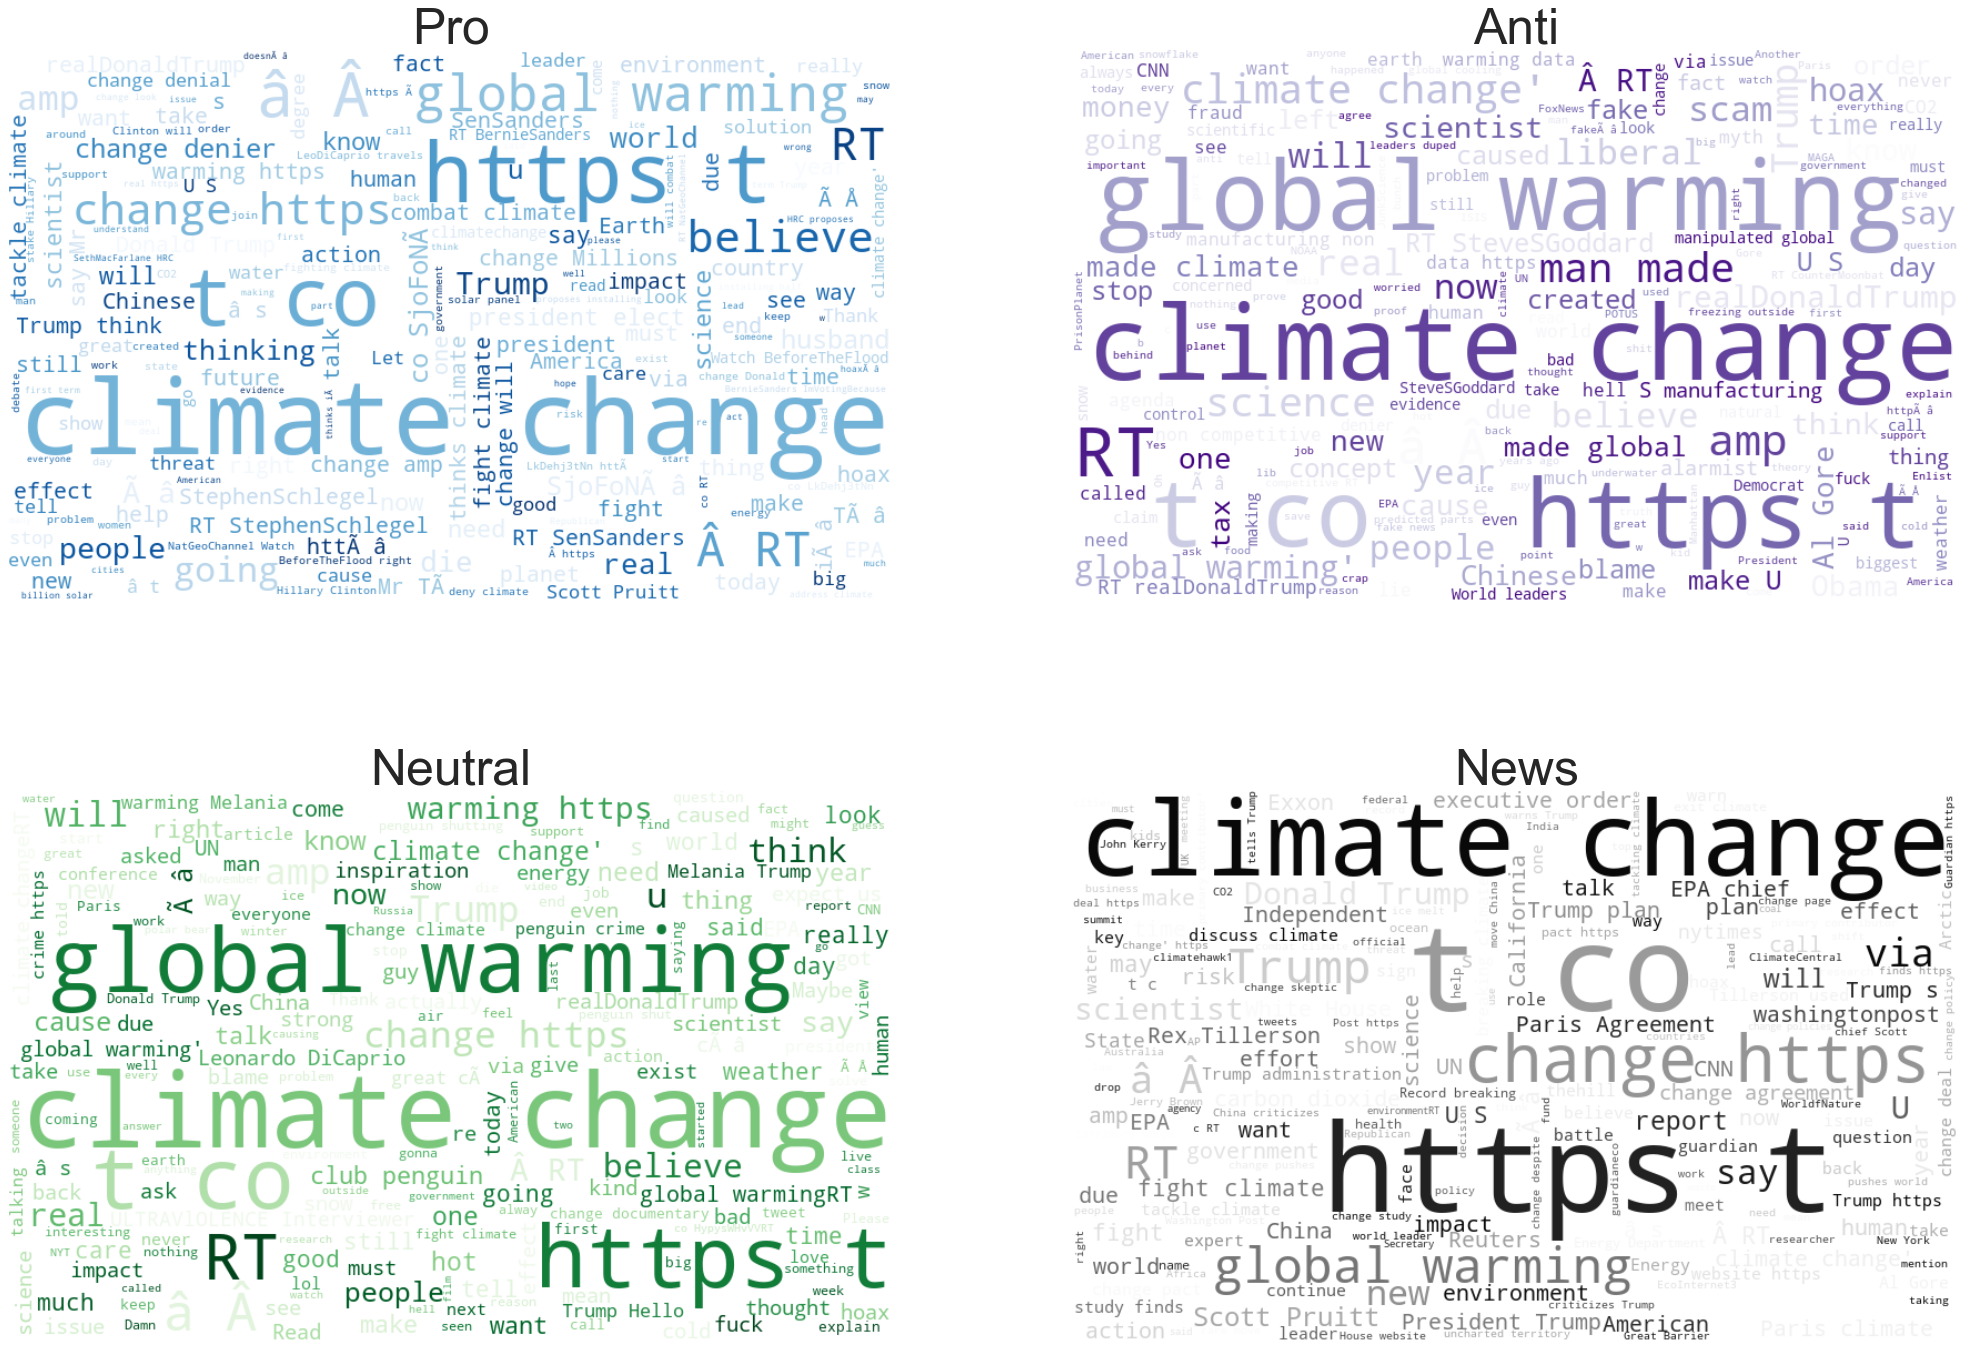

In [78]:
# Plot pro and anti wordclouds next to one another for comparisson
fig, arr = plt.subplots(2,2, figsize=(35,25))
arr[0,0].imshow(Pro_wc, interpolation="bilinear")
arr[0,1].imshow(Anti_wc, interpolation="bilinear")
arr[1,0].imshow(Neutral_wc, interpolation="bilinear")
arr[1,1].imshow(News_wc, interpolation="bilinear")

# Remove the ticks on the x and y axes
for ax in fig.axes:
    plt.sca(ax)
    plt.axis('off')

arr[0,0].set_title('Pro', fontsize=50)
arr[0,1].set_title('Anti', fontsize=50)
arr[1,0].set_title('Neutral', fontsize=50)
arr[1,1].set_title('News', fontsize=50)
#plt.tight_layout()
plt.show()


We can see some of the most frequent words used in tweets with the greatest sentiment in each class from these word clouds, which gives us some idea of the kinds of words a tweet with a particular sentiment might contain. Pro class, for instance, uses terms and phrases like "fight climate" and "tackle climate" while Anti uses words and phrases like "scam" and "hoax"

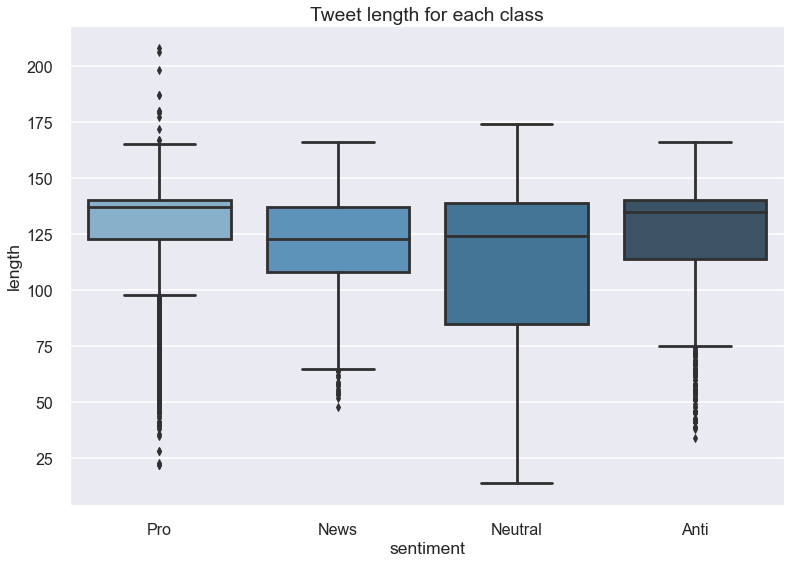

In [82]:
# Plot the distribution of the length tweets for each class using a box plot
sns.boxplot(x=train_copy['sentiment'], y=train_copy['length'], data=train_copy, palette=("Blues_d"))
plt.title('Tweet length for each class')
plt.show()

The five horizontal lines in the boxplots provide the information of the five number summary and the dots on the right hand side of the graph is a display of outliers.

In [95]:
train_copy['hashtags'] = train_copy['message'].apply(lambda x: len(re.findall(r'[#]',x)))
print('Number of hashtags per sentiment class')
train_copy.groupby('sentiment').sum()['hashtags']

Number of hashtags per sentiment class


sentiment
Anti        243
Neutral     415
News        878
Pro        2633
Name: hashtags, dtype: int64

The above code shows the list of hashtags and their length 

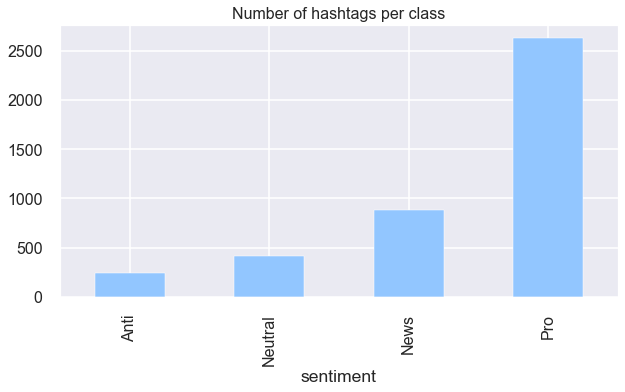

In [96]:
plot9 = plt.figure(figsize=(10,5))
plt.title('Number of hashtags per class',fontsize = 16)
train_copy.groupby('sentiment').sum()['hashtags'].plot(kind='bar')
plt.show()

The above bar chart shows the number of hashtags per class

In [97]:
# Extract lists of urls and find the length of those lists
train_copy['url'] = train_copy['message'].apply(lambda x: len(re.findall(r'https\S+|www\S+',x)))
print('Number of urls per sentiment class')
train_copy.groupby('sentiment').sum()['url']

Number of urls per sentiment class


sentiment
Anti        561
Neutral     909
News       4156
Pro        4499
Name: url, dtype: int64

The above code shows the list of urls and their length

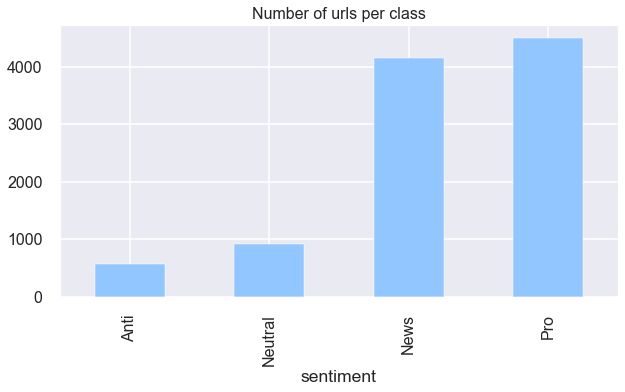

In [99]:
plot8 = plt.figure(figsize=(10,5))
plt.title('Number of urls per class',fontsize = 16)
train_copy.groupby('sentiment').sum()['url'].plot(kind='bar')
plt.show()

The above bar chart shows the number of urls per class

In [230]:
#Showing the full text of 10 Negative Sentiment Class tweets: ')
for tweet in senti_gb.get_group('Anti')['message'][100:110]:
    print(tweet)

@rambogooner The people saying “don’t look at the sun” are the same people who say climate change is real — and we all know that’s a lie.
RT @TheFoundingSon: NOAA scientists manipulated temperature data to make global warming seem worse

Who's surprised? Not me
https://t.co/Rj…
RT @GeorgiaLogCabin: NOAA's global warming data manipulation https://t.co/flujjaaWUR #Economy #National
It's really not about science at all, but religious fundamentalism of the climate change cult. With a sprinkling of… https://t.co/vV8L1zTsGq
RT @MarkACollett: The biggest threat to the environment isn't global warming, it's overpopulation that is fuelled by liberal aid to the thi…
RT @davidicke: Founder of Weather Channel blasts total fraud of climate change: Science fraud run by the Left…
@ABC Ya but all the experts say it's not climate change ass hat fake news it's a natural occurrence for thousands o… https://t.co/kvDP3USb8m
RT @JonoZalay: Here's a pic of arctic ice proving climate change...
Not falling for

In [231]:
#Showing the full text of 10 Neutral Sentiment Class tweets
for tweet in senti_gb.get_group('Neutral')['message'][1000:1010]:
    print(tweet)

RT @superlativemaui: climate change, healthcare, taxes, alzheimer's, supreme court, race and Ã°Å¸ï†Â³Ã¯Â¸ï†Ã¢â‚¬ï†Ã°Å¸Å’Ë† equality, immigration, policing, war, worÃ¢â‚¬Â¦
#Trumpland .. next, you'll be blaming him for climate change?! Fuck off you reprehensible creature https://t.co/ynLk5jQZ9J
Making the environment great again...Trump's environment chief says CO2 not main cause of global warming https://t.co/D0KBxKCkjr
Why do we have to make a deal to do OUR part for climate change? Why can't everyone just do their part for our planet?
@ValentinoKhan i always start my conversations talking about global warming, it's a real ice-breaker! High five! 🖐
straightedge felt really good but then I started working full time again in the season that makes me extremely suicidal fuck global warming
Takes 2 seconds. POLL: What do you think of Trump's executive order on climate change? https://t.co/OxE7V0Wn0g https://t.co/rIf5hYrGxz
RT @mitchellvii: Americans are even less worried about Russia th

In [232]:
#Showing the full text of 10 Pro Sentiment Class tweets
for tweet in senti_gb.get_group('Pro')['message'][100:110]:
    print(tweet)

#SDG13 is a call to take urgent action to combat #climate change and its impacts. Join the movement:Ã¢â‚¬Â¦ https://t.co/BqxZ5ZkBjv
RT @bradleym4: @JuddLegum Me (to my 14 yo kid): do you believe in climate change?
Kid: It's a scientific fact, so it doesn't matte…
RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦
When China calls out Donald Trump on climate change, you know itÃ¢â‚¬â„¢s bad https://t.co/ukXyPvuvJf
RT @billmckibben: 'ExxonMobil has a long history of peddling misinformation on climate change.' @elizkolbert in @NewYorker #ExxonKnew https…
RT @MrDenmore: Apart from taking us to the brink of recession, doubling the deficit and making us a pariah on refugees &amp; climate change, th…
RT @NatGeoChannel: One of the easiest ways to help combat climate change in your daily life is to stop eating beef. Here's why:Ã¢â‚¬Â¦
Effects of climate change https://t.co/6eYTZtqLoW
RT @marcuschown:

In [233]:
#Showing the full text of 10 News Class tweets
for tweet in senti_gb.get_group('News')['message'][100:110]:
    print(tweet)

RT @Wine_Newz: The #Wine industry in #Europe could be in trouble due to global warming, researchers warn https://t.co/1LErjnPpMI
Trump really doesn't want to face these 21 kids on climate change https://t.co/oHfhg9Gz1O https://t.co/ExhoFHE2KQ
RT @aggyk: Five Pacific islands lost to rising seas as climate change hits https://t.co/kmnBmFANdw
NASA is defiantly communicating climate change science despite Trump’s doubts' https://t.co/E3qtwWYV3Z  @NASAClimate Lift ‘em up, y’all!
RT @Fusion: Peru is suffering its worst floods in recent history—and some scientists say global warming is to blame: https://t.co/3EGbsYVNJq
RT @Environment_Ke: Kenya has ratified the Paris Agreement on climate change @JudiWakhungu @MyGovKe @NemaKenya @KeForestService…
RT @HuffingtonPost: California professors sign open letter to Trump urging action on climate change https://t.co/zQBYtItW7n https://t.co/bA…
RT @aireguru: California knocks Trump as it extends climate change effort: SAN FRANCISCO (AP) — Gov.… https://

### 3.2 Tweet Cleaning

### Tweet Cleaning

### Remove Dupicate tweets

In [29]:
def remove_duplicates(df, column_name):
    """A function to remove all duplicates in a dataframe 
       and keep just the first occurance of it.

    Args:
        df (Dataframe): a dataframe with duplicate row
        col (string): a column or feature name within a the dataframe we 

    Returns:
        DataFrame: a dataframe with with all duplicated observations deleted
    """
    return df.drop_duplicates(subset=column_name, keep='first', inplace=True)

remove_duplicates(train_copy, 'message') #remove duplicate tweets from train dataset

In [30]:
#check shape of both dataset after removing duplicates
print(f'Train data shape after removing duplicates: {train_copy.shape}')
print(f'Train data shape after removing duplicates: {test_copy.shape}')

Train data shape after removing duplicates: (14229, 3)
Train data shape after removing duplicates: (10546, 2)


In [17]:
"""# Describing patterns
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'

# Applying replace method on both datasets
train_copy['message'] = train_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True) #train dataset
test_copy['message'] = test_copy['message'].replace(to_replace = pattern_url, value = subs_url, regex = True) #test dataset"""

In [ ]:
def replace_tweet_urls(df, column_name):
    
    # Describing regrex url pattern
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    
    #substitute text to replace url
    sub_url = r'url'
    
    df[column_name] = df[column_name].replace(to_replace = pattern_url,
                            value = sub_url, 
                            regex = True) #train dataset
    return df

# Applying replace_tweet_urls function on both datasets replace all long urls with just 'url'  
replace_tweet_urls(train_copy, 'message')
replace_tweet_urls(test_copy, 'message')

In [235]:
"""def data_refine(df):
    #remove puntuations
    df = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', df)
    
    #remove numbers
    df = re.sub(r'\d+', '', df) 
    
    # Remove extra whitespace
    df = re.sub(r'\s\s+', ' ', df)
      
    # Remove space in front of tweet
    df = df.lstrip(' ') 
      
    # Remove url's
    df = re.sub(r'https?:\/\/.*\/\w*', '', df)
    
    # Remove @ signs   
    df = re.sub('@[\w]*','',df)
    
    # Remove hashtags
    df = re.sub(r'#\w*', '', df)
    
    #change all characters to lower case
    df =df.lower()
    
    #remove dashes '-'
    df = df.replace('-', '', regex=True)
    
    
    return df
    
"""

In [32]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#clean tweet
def clean_text(df):
    stop_words = set(stopwords.words("english")) 
    #df = df.apply(lambda x: word_tokenize(x))
    lemma = WordNetLemmatizer()
    
    df = re.sub(r'\d+', '', df)
    # Remove extra whitespace
    df = re.sub(r'\s\s+', ' ', df)
    
    # Remove space in front of tweet
    df = df.lstrip(' ')
    
    #str.replace(/_/g, '')
    df = re.sub('<[^<]+?>','', df)
    df = re.sub(r'[^\w\s]','',df, re.UNICODE)
    df = df.lower()
    df = [lemma.lemmatize(token) for token in df.split(" ")]
    df = [lemma.lemmatize(token, "v") for token in df]
    df = [word for word in df if not word in stop_words]
    df = " ".join(df)
    return df


In [33]:
train_copy['message'] = train_copy.message.apply(lambda x: clean_text(x))
test_copy['message'] = test_copy.message.apply(lambda x: clean_text(x))

In [34]:
train_copy.head()

,sentiment,message,tweetid
0,Pro,polyscimajor epa chief doesnt think carbon dio...,625221
1,Pro,like lack evidence anthropogenic global warm,126103
2,News,rt rawstory researcher say three year act clim...,698562
3,Pro,todayinmaker wire wa pivotal year war climate...,573736
4,Pro,rt soynoviodetodas racist sexist climate chan...,466954


In [35]:
test_copy.head()

,message,tweetid
0,europe look china make sure alone fight climat...,169760
1,combine poll staffer climate change woman righ...,35326
2,scary unimpeachable evidence climate change al...,224985
3,karoli morgfair osborneink dailykos putin get ...,476263
4,rt fakewillmoore female orgasm cause global wa...,872928


In [36]:
#convert sentiment class back to numeric

def class_convert_2(df):
    
    df = train_copy.copy()
    numerical_class = []
    old_class = df['sentiment']
    
    for class_num in old_class:
        if class_num == 'News':
            numerical_class.append(2)
        elif class_num == 'Pro':
            numerical_class.append(1)
        elif class_num == 'Neutral':
            numerical_class.append(0)
        else:
            numerical_class.append(-1)
            
    df['sentiment'] = numerical_class
        
    return df

train_copy = class_convert_2(train_df)


In [ ]:
"""#refine dataframe with the above function
train_copy['message'] = train_copy['message'].apply(data_refine)
train_copy.head(10)"""

In [ ]:
"""train_copy['message'] = train_copy['message'].apply(data_refine)
train_copy.tail(10)"""

In [ ]:
"""train_copy.iloc[15809]"""

In [ ]:
#This is a better function than the first but will need to work on this later

"""
new_df = train_df.copy()
def clean_df(df, col):
    
    #remove all special characters
    df[col] = df[col].str.replace('[^A-Za-z0-9]', '', flags=re.UNICODE)
    
    #remove numbers
    df = re.sub(r'\d+', '', df) 
    
    # Remove extra whitespace
    df = re.sub(r'\s\s+', ' ', df)
    
    # Remove space in front of tweet
    df = df.lstrip(' ')
    
    #change all characters to lower case
    df =df.lower()
    
    return df"""

In [ ]:
# evaluate correlation

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

### 4.1 Raw Imbalanced Dataset

Before we try to apply any of the model improvement method, we would like to make use of the raw imbalanced dataset for experimental purposes. Our goal is to use the raw imbalanced dataset as well as the other engineered dataset and compare the results to see which of our datasets gave the best predictive power 

In [37]:
#Split train dataset features into Predictor and Target
X_imbalanced = train_copy['message'] 
y_imbalanced = train_copy['sentiment'] 

unseen_X = test_copy['message'] 


### 4.2 Fixing Dataset Feature Imbalance

Note: on data imbalance goes here

### 4.2.1 SMOTE Resampling with TfidfVectorizer

SMOTE resampling overview notes here

In [39]:
#import SMOTE 
from imblearn.over_sampling import SMOTE, SVMSMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm


#creating an object of the TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.90, min_df=1, ngram_range=(1,2), stop_words='english')

# bag-of-words generator
X_vectorized = vectorizer.fit_transform(X_imbalanced)

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(random_state = 2) 
svm_smote = SVMSMOTE(random_state = 100, svm_estimator = svm.SVC(kernel='linear'))

# Fit the model
X_smote, y_smote = svm_smote.fit_resample(X_vectorized, y_imbalanced)

{'web': 'https://www.comet.com/api/image/download?imageId=a05f4dfc82e74c239d092d6ca9fd66aa&experimentKey=4fff5b59bac347018385d164e8863060',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=a05f4dfc82e74c239d092d6ca9fd66aa&experimentKey=4fff5b59bac347018385d164e8863060',
 'imageId': 'a05f4dfc82e74c239d092d6ca9fd66aa'}

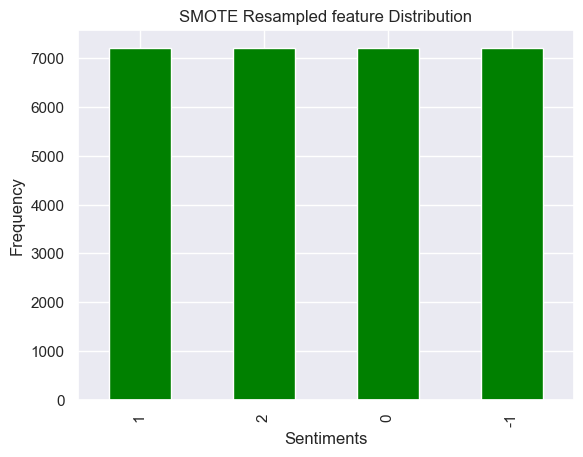

In [40]:
# visualise distribution of  SMOTE resampling
y_smote.value_counts().plot(kind='bar', color='green')
plt.title('SMOTE Resampled feature Distribution')
plt.ylabel('Frequency')
plt.xlabel('Sentiments')
experiment.log_figure(figure_name = 'SMOTE Resampled Feature Distribution')

ref.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SVMSMOTE.html#imblearn.over_sampling.SVMSMOTE

pip install imblearn

### 4.2.2 Downsampling

Downsampling overview goes here

In [41]:
from sklearn.utils import resample

#check sentiment distribution to determine which sentiments needs upsampling
train_copy.groupby('sentiment').count()['message'].reset_index().sort_values(by='message')

,sentiment,message
0,-1,1221
1,0,2244
3,2,3542
2,1,7222


It is clear that the Anti sentiment has the least representation in the dataset. We therefore, need to downsample the other three sentiments (News, Neutral and Pro) to have the same sample observation of 1221 just as the Anti sentiment. Doing so will eliminate the Bias within our dataset

In [42]:
'''
Upsampling the dataset

'''

#declaring our sentiment classes
pro = train_copy[train_copy['sentiment'] == 1]
news = train_copy[train_copy['sentiment'] == 2]
neutral =train_copy[train_copy['sentiment'] == 0]
anti = train_copy[train_copy['sentiment'] == -1]

##Upsample News sentiment
down_sampled_news = resample(news, replace=True, n_samples=len(anti))   

#Upsample Neutral sentiment
down_sampled_neutral = resample(neutral, replace=True, n_samples=len(anti)) 

#Upsample Anti sentiment
down_sampled_pro = resample(pro, replace=True, n_samples=len(anti)) 

down_sampled_df = pd.concat([down_sampled_pro, down_sampled_news, down_sampled_neutral, anti])

{'web': 'https://www.comet.com/api/image/download?imageId=16d210583c4447d5bbe4681a577b76ff&experimentKey=4fff5b59bac347018385d164e8863060',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=16d210583c4447d5bbe4681a577b76ff&experimentKey=4fff5b59bac347018385d164e8863060',
 'imageId': '16d210583c4447d5bbe4681a577b76ff'}

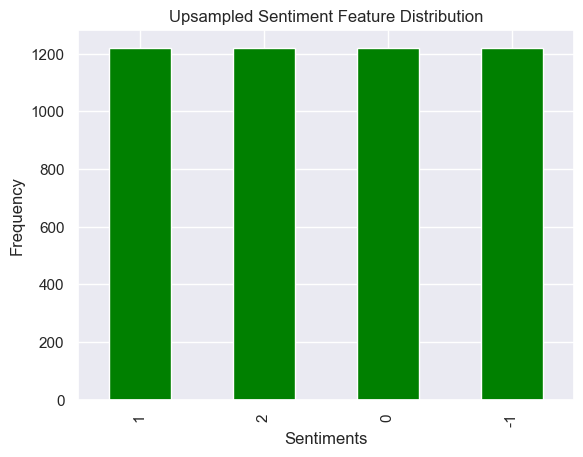

In [43]:
# visualise distribution of  Down sampled dataset
down_sampled_df['sentiment'].value_counts().plot(kind='bar', color='green')
plt.title('Upsampled Sentiment Feature Distribution')
plt.ylabel('Frequency')
plt.xlabel('Sentiments')
experiment.log_figure(figure_name='Down sampled Sentiment feature Distribution')

In [44]:
#Split Down sampled train dataset features into Predictors and Target 
X_down_sampled = down_sampled_df['message']
y_down_sampled = down_sampled_df['sentiment']

### 4.2.3 Upsampling

Upsampling overview goes here

In [45]:
from sklearn.utils import resample

#check sentiment distribution to determine which sentiments needs upsampling
train_copy.groupby('sentiment').count()['message'].reset_index().sort_values(by='message', ascending=False)

,sentiment,message
2,1,7222
3,2,3542
1,0,2244
0,-1,1221


It is clear that thr Pro sentiment has the largest representation in the dataset. We therefore, need to upsample the other three sentiments (News, Neutral and Anti) to have the same sample observation of 7222 just as the Pro sentiment. Doing so will eliminate the Pro Sentiment Bias within our dataset

In [46]:
'''
Upsampling the dataset
'''

#declaring our sentiment classes
pro = train_copy[train_copy['sentiment'] == 1]
news = train_copy[train_copy['sentiment'] == 2]
neutral =train_copy[train_copy['sentiment'] == 0]
anti = train_copy[train_copy['sentiment'] == -1]

##Upsample News sentiment
upsampled_news = resample(news, replace=True, n_samples=len(pro))   

#Upsample Neutral sentiment
upsampled_neutral = resample(neutral, replace=True, n_samples=len(pro)) 

#Upsample Anti sentiment
upsampled_anti = resample(anti, replace=True, n_samples=len(pro)) 

upsample_df = pd.concat([pro, upsampled_news, upsampled_neutral, upsampled_anti])


{'web': 'https://www.comet.com/api/image/download?imageId=55539126a9fb4935bf5b7b10a7418169&experimentKey=4fff5b59bac347018385d164e8863060',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=55539126a9fb4935bf5b7b10a7418169&experimentKey=4fff5b59bac347018385d164e8863060',
 'imageId': '55539126a9fb4935bf5b7b10a7418169'}

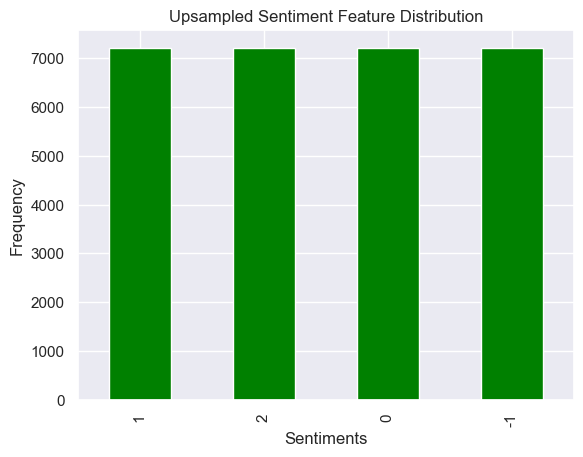

In [47]:
# visualise distribution of  Upsampled dataset
upsample_df['sentiment'].value_counts().plot(kind='bar', color='green')
plt.title('Upsampled Sentiment Feature Distribution')
plt.ylabel('Frequency')
plt.xlabel('Sentiments')
experiment.log_figure(figure_name='Upsampled Sentiment feature Distribution')

In [48]:
#Split Upsampled train dataset features into Predictors and Target 
X_upsampled = upsample_df['message']
y_upsampled = upsample_df['sentiment']


X_upsampled.head()

0    polyscimajor epa chief doesnt think carbon dio...
1         like lack evidence anthropogenic global warm
3    todayinmaker wire  wa pivotal year war climate...
4    rt soynoviodetodas  racist sexist climate chan...
5    worth read whether dont believe climate change...
Name: message, dtype: object

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [49]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

#split data train dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X_imbalanced, y_imbalanced, test_size = 0.2, random_state=50)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

imbalanced_classifier = Pipeline([('vect', 
                      TfidfVectorizer(stop_words='english', 
                        min_df=1, 
                        max_df=0.9, 
                        ngram_range=(1, 3))),
                     ('tfidf', TfidfTransformer()),
                     ('LG',LogisticRegression(multi_class='ovr')),
                     ])

imbalanced_classifier.fit(X_train,y_train)


Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.9, ngram_range=(1, 3),
                                 stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('LG', LogisticRegression(multi_class='ovr'))])

In [51]:
# Getting predicions from the X_test
imbalanced_pred = imbalanced_classifier.predict(X_test)
#Pritting the classification report
print(metrics.classification_report(y_test,imbalanced_pred))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,imbalanced_pred))

              precision    recall  f1-score   support

          -1       0.88      0.08      0.15       250
           0       0.77      0.09      0.16       456
           1       0.60      0.95      0.74      1432
           2       0.84      0.60      0.70       708

    accuracy                           0.65      2846
   macro avg       0.77      0.43      0.44      2846
weighted avg       0.71      0.65      0.58      2846

0.6496837666900913


In [52]:
#Getting the predicted sentimet from test dataset
y_pred = imbalanced_classifier.predict(test_copy['message'])

y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [53]:
#Making the tweetid to be the idex
test = test_copy.set_index('tweetid')

In [54]:
final_test = test.index

In [55]:
#Creating the kaggle submission Dataframe
final_dataframe = {'tweetid': final_test, 'sentiment':np.round(y_pred, 0)}
submission = pd.DataFrame(data=final_dataframe)
submission = submission[['tweetid', 'sentiment']]

In [57]:
submission.set_index('tweetid').head()

submission.to_csv("kaggle_submission1.csv",index  = False) #wrting csv file

### Model Function

In [ ]:
def train_model(model, X, y, smote='No'):
    
    # Create an instance of experiment with your api key
    experiment = Experiment(
    api_key="sj5muA45yTe4qncu3OyeXQ6W2",
    project_name="Twitter Climate Change Sentimental Analysis",
    workspace="obengkojo23",
    )
    
    pipe = Pipeline([('vect', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 3))),('tfidf', TfidfTransformer()),('model', model)])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    
    if smote == 'No':
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        f1_metric = f1_score(y_test, y_pred, average='weighted')
        accuracy_metric = accuracy_score(y_test, y_pred)
        recall_metric = recall_score(y_test, y_pred, average='weighted')
        precision_metric = precision_score(y_test, y_pred, average='weighted')
        
    
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1_metric = f1_score(y_test, y_pred, average='weighted')
        accuracy_metric = accuracy_score(y_test, y_pred)
        recall_metric = recall_score(y_test, y_pred, average='weighted')
        precision_metric = precision_score(y_test, y_pred, average='weighted')
        
    
    print(f'f1_score: {f1_metric}')
    print(f'Accuracy: {accuracy_metric}')
    print(f'Recall:   {recall_metric}')
    print(f'Precision: {precision_metric}')
    
    metrics = { 'f1_score':f1_metric, 'Accuracy':accuracy_metric, 'Recall': recall_metric, 'Precision':precision_metric}
    experiment.log_metrics(metrics)
    experiment.end()
    return f1_metric, accuracy_metric, recall_metric, precision_metric

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic